In [34]:
import pandas as pd

In [35]:
df = pd.read_csv(razor.api.project_space_path("bank-product-recommendation/data/train.txt"),sep="|")
df = df[['ID_Customer', 'Cod_Prod', 'Cod_Fecha']]
df.shape

(3350601, 3)

In [36]:
df["Cod_Fecha"] =  pd.to_datetime(df["Cod_Fecha"],format='%Y-%m')
primerMes = pd.datetime(2007, 1, 1, 0, 0, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [37]:
print(df.shape)
print((df["Cod_Fecha"]>=primerMes).sum())

(3350601, 3)
2586137


In [38]:
df = df.loc[df["Cod_Fecha"]>=primerMes,]

In [39]:
df.head()

,ID_Customer,Cod_Prod,Cod_Fecha
0,A0000001,601,2007-05-01
1,A0000001,704,2013-04-01
4,A0000001,1011,2011-04-01
7,A0000002,9992,2015-02-01
10,A0000003,301,2012-05-01


In [40]:
prod_map = pd.read_csv('DataGeneration/data/product_details.csv', usecols = ['Cod_Prod','Product Names','Product Category'])
prod_map['Product Names'] = prod_map['Product Names'].str.strip()
prod_map['Product Names'] = prod_map['Product Names'].str.replace('\W', '')
prod_map

,Cod_Prod,Product Names,Product Category
0,601,EverydayCheckingAccounts,Checking Accounts
1,301,ClearAccessBankingCheckingAccounts,Checking Accounts
2,201,PreferredCheckingAccounts,Checking Accounts
3,2302,Everydaysavingaccount,Saving Accounts
4,9991,DebitCard,Debit Card
...,...,...,...
89,803,DisciplinedUSCoreA,Mutual Funds
90,2901,DisciplinedUSCoreAdmin,Mutual Funds
91,1308,DisciplinedUSCoreC,Mutual Funds
92,502,DiscoveryA,Mutual Funds


In [41]:
df = df.merge(prod_map,on='Cod_Prod')
df.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Product Names,Product Category
0,A0000001,601,2007-05-01,EverydayCheckingAccounts,Checking Accounts
1,A0000004,601,2008-05-01,EverydayCheckingAccounts,Checking Accounts
2,A0000006,601,2012-11-01,EverydayCheckingAccounts,Checking Accounts
3,A0000007,601,2012-08-01,EverydayCheckingAccounts,Checking Accounts
4,A0000008,601,2014-03-01,EverydayCheckingAccounts,Checking Accounts


In [42]:
print(df.shape)
print(df.ID_Customer.nunique())

(2586137, 5)
602673


In [43]:
products = list(set(df['Product Names']))
products[:10]

['ClassicValueFundInst',
 'RothIRA',
 'Premier2YearFlexibleCashISAExclusivelyforPremiercustomers',
 'DiversifiedCapBldrC',
 'Usefundsfromyourhomemortgage',
 '2YearFlexibleBond',
 'BusinessLoan',
 'CareerandCommunityCollegeStudentLoan',
 'AdjustableRateGovtInst',
 'InstantCashISA']

In [44]:
print(len(products))
[p for p in prod_map['Product Names'] if p not in products] #<-- mutual fund missing

93


['DiscoveryAdmin']

In [46]:
i=0
for p,q in zip(prod_map['Product Names'],prod_map['Product Category']):
    if p!='DiscoveryAdmin' and i !=5:
        print(p+"-----------"+q)
        df.loc[df['Product Names']==p,p]=2
        df.loc[df['Product Category']==q,p]=1
        df.loc[(df['Product Names']!=p) & (df['Product Category']!=q),p]=0
        i+=1

EverydayCheckingAccounts-----------Checking Accounts
ClearAccessBankingCheckingAccounts-----------Checking Accounts
PreferredCheckingAccounts-----------Checking Accounts
Everydaysavingaccount-----------Saving Accounts
DebitCard-----------Debit Card


In [47]:
df

,ID_Customer,Cod_Prod,Cod_Fecha,Product Names,Product Category,EverydayCheckingAccounts,ClearAccessBankingCheckingAccounts,PreferredCheckingAccounts,Everydaysavingaccount,DebitCard
0,A0000001,601,2007-05-01,EverydayCheckingAccounts,Checking Accounts,1.0,1.0,1.0,0.0,0.0
1,A0000004,601,2008-05-01,EverydayCheckingAccounts,Checking Accounts,1.0,1.0,1.0,0.0,0.0
2,A0000006,601,2012-11-01,EverydayCheckingAccounts,Checking Accounts,1.0,1.0,1.0,0.0,0.0
3,A0000007,601,2012-08-01,EverydayCheckingAccounts,Checking Accounts,1.0,1.0,1.0,0.0,0.0
4,A0000008,601,2014-03-01,EverydayCheckingAccounts,Checking Accounts,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2586132,A0456842,104,2007-05-01,ClassicValueFundC,Mutual Funds,0.0,0.0,0.0,0.0,0.0
2586133,A0456990,104,2009-06-01,ClassicValueFundC,Mutual Funds,0.0,0.0,0.0,0.0,0.0
2586134,A0457559,104,2009-02-01,ClassicValueFundC,Mutual Funds,0.0,0.0,0.0,0.0,0.0
2586135,A0458116,104,2007-06-01,ClassicValueFundC,Mutual Funds,0.0,0.0,0.0,0.0,0.0


In [2]:
import razor.flow as rf
import numpy as np

@rf.block
class CustomDataGenSession:
    out_df: rf.Output[pd.core.frame.DataFrame]
    def run(self):
        df = pd.read_csv(razor.api.project_space_path("/train.txt"),sep="|")
        df = df[['ID_Customer', 'Cod_Prod', 'Cod_Fecha']]
        df["Cod_Fecha"] =  pd.to_datetime(df["Cod_Fecha"],format='%Y-%m')
        primerMes = pd.datetime(2007, 1, 1, 0, 0, 0)
        df = df.loc[df["Cod_Fecha"]>=primerMes,]
        prod_map = pd.read_csv(razor.api.project_space_path("/cajamar_product_map.csv"))
        prod_map['Product Names'] = prod_map['Product Names'].str.strip()
        prod_map['Product Names'] = prod_map['Product Names'].str.replace('\W', '')
        df = df.merge(prod_map,on='Cod_Prod')
        for p,q in zip(prod_map['Product Names'],prod_map['Product Category']):
            if p!='DiscoveryAdmin':
                print(p+"-----------"+q)
                df.loc[(df['Product Names']!=p) & (df['Product Category']!=q),p]=0
                df.loc[df['Product Category']==q,p]=np.random.choice(np.arange(25,100),(df['Product Category']==q).sum())
                df.loc[df['Product Names']==p,p]=np.random.choice(np.arange(10,75),(df['Product Names']==p).sum())
                df[p] = df[p].astype('int')
        #roll to cust month with every customer and every month with prev month logic
        col_prods = [x for x in list(prod_map['Product Names']) if x!="DiscoveryAdmin"]
        df = df.groupby(['ID_Customer','Cod_Fecha'])[col_prods].sum().reset_index()
        df.to_csv(razor.api.project_space_path("/sess_data.csv"),index=False)
        # self.logger.info(df.head())
        # self.logger.info(df.columns)
        self.out_df.put(df)

In [2]:
import razor.flow as rf
import numpy as np

@rf.block
class CustomDataGenSession2:
    out_df: rf.Output[pd.core.frame.DataFrame]
    def run(self):
        df = pd.read_csv(razor.api.project_space_path("/sess_data.csv"))
        tmp1 = df[['Cod_Fecha']].drop_duplicates().copy()
        tmp1['key'] = 1
        tmp2 = df[['ID_Customer']].drop_duplicates().copy()
        tmp2['key'] = 1
        tmp3 = tmp1.merge(tmp2,on='key')
        del(tmp1)
        del(tmp2)
        tmp3 = tmp3.sort_values(['ID_Customer','Cod_Fecha']).reset_index()
        tmp3 = tmp3.drop(columns=['index','key'])
        # df = tmp3.merge(df,how="left",on=['ID_Customer','Cod_Fecha']).fillna(0)
        tmp3.to_csv(razor.api.project_space_path("/sess_data_main.csv"),index=False)
        self.logger.info(tmp3.head())
        self.out_df.put(tmp3)

In [15]:
import razor.flow as rf
import numpy as np

@rf.block
class CustomDataGenSession3:
    out_df: rf.Output[pd.core.frame.DataFrame]
    def run(self):
        df = pd.read_csv(razor.api.project_space_path("/sess_data.csv"))
        tmp3 = pd.read_csv(razor.api.project_space_path("/sess_data_main.csv"))
        df = tmp3.merge(df,how="left",on=['ID_Customer','Cod_Fecha'])
        df.to_csv(razor.api.project_space_path("/sess_data_final.csv"),index=False)
        self.logger.info(tmp3.head())
        self.out_df.put(tmp3)

In [16]:
cust_gen_sess = CustomDataGenSession3()
cust_gen_sess.executor =  rf.ContainerExecutor(cores=20, memory=70048)

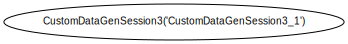

In [17]:
pipeline = rf.Pipeline(name="cust_datagen_session",targets=[cust_gen_sess])
pipeline

In [18]:
razor.api.engines('DS-Engine-Load-Test').execute(pipeline)

PlatformPipelineRun(project_id='847228a6-2721-483c-a761-529bbb5cf0af', pipeline_id='041e9794-2991-11eb-b21a-0242ac110004', pipeline_name='cust_datagen_session', pipeline_run_id='3617b655-814f-4710-8a1c-e7ea935c8939', pipeline_version=None, comment=None, created_on='2020-11-18T11:27:24.357+00:00', start_time=None, end_time=None, eta=0, run_at=1605698844357, run_duration=0, compute_time=0, wait_time=282, ran_by_user=RanByUser(user_name='Sidharth Behera', email='siddharth.behera@razorthink.com'), status='YET_TO_START', block_status=[PlatformPipelineBlockRun(pipeline_run_id='3617b655-814f-4710-8a1c-e7ea935c8939', pipeline_name='cust_datagen_session', pipeline_status='YET_TO_START', block_id='94ae5216-a773-441c-a39e-47424ef49cbd', block_run_id='c07a6b0c-3431-4fa7-b284-a4f8743a468f', block_name='CustomDataGenSession3_1', resource_spec=ResourceAllocated(cores=20, memory=70048, use_gpu=False, gpu=0, use_gpu_if_available=False, cluster_configuration={'worker': None, 'workerCore': None, 'workerMemory': None, 'numberOfInstances': None, 'maxServerCount': None}, additional_env={}, run_env='PYTHON'), technology='PYTHON', status='READY_TO_GO', containers=[], cluster_id='94ae5216-a773-441c-a39e-47424ef49cbd', _log=None, _metric=None, wait_time=0, compute_time=0, start_time=None, end_time=None, queued_at='2020-11-18T11:27:25.000+00:00')], run_number=29, pipeline_variable_list=[], block_run_details=[BlockRunDetail(block_id='94ae5216-a773-441c-a39e-47424ef49cbd', block_run_id='c07a6b0c-3431-4fa7-b284-a4f8743a468f', block_name='CustomDataGenSession3_1', technology='PYTHON', log_path=None, input_parameters='{}', output_parameters=None, status='READY_TO_GO', created_at='2020-11-18T11:27:24.527+00:00', queued_at='2020-11-18T11:27:25.000+00:00', start_time=None, end_time=None, compute_time=0, wait_time=0, run_time=0, block_run_output_list=[], resource_allocated=ResourceAllocated(cores=20, memory=70048, use_gpu=False, gpu=0, use_gpu_if_available=False, cluster_configuration={'worker': None, 'workerCore': None, 'workerMemory': None, 'numberOfInstances': None, 'maxServerCount': None}, additional_env={}, run_env='PYTHON'))], pipeline_json='{\n  "id": "041e9794-2991-11eb-b21a-0242ac110004",\n  "projectId": "847228a6-2721-483c-a761-529bbb5cf0af",\n  "name": "cust_datagen_session",\n  "description": "",\n  "blocks": [\n    {\n      "name": "CustomDataGenSession3_1",\n      "id": "94ae5216-a773-441c-a39e-47424ef49cbd",\n      "artifact_id": null,\n      "class_name": "CustomDataGenSession3",\n      "code": "eJyNVs9vE0cU3l3/iJ2UAAkNoq1KharKqIpNYmOwQBxqoGotGYlUnIqG2Z1Zz8br3e3ObGgqR2qFQoI0nDI9VFWl5Nj+Ddwq9d9q38yusYU41D549s3svPd973tf8nP5179qlvnIy14YZyQJvHFImwtrJa+glLJ9kmJBER/TkIo4Ql6IOVcnqsEseQlN8Ph9e7LmZkEogogrWRb7CYWg/LCfcRFP7mOBv6bRDuU8iKO2Yk6DlRtsidVYRVZjd5d6Ao4fqgMllxAisYeQGnL5Wa+7ddvbvtVub23f6tymros77nbH7/lbHVhvYzUU6jG81ZDLCE1ikoUU3pQ1eMBBpJfnEcJRFAssIDOHCKSoxplAxFeyjuKEAtY4hbwjKgJBJ7rstRT/FKdNP4yfN+FskgkAVX1kVnr/YoIjgnnTi1Pa9FM8AebqGuRDsz5RL6EqLktpFingbBX5QRgiP4s8XUXB5Pk5k2YLwhA9hwoa0YzDWj8m9Dv9cAi3Ngb2wBqUBpVBvx8J69QWzm7ptEzsM/ge2AsRx0ScqbNbmdqkRMqkMnJI9XXpwJ7au9Xi1NKZTWqk/tqxram1u3Ramzqn9TPrzDbPy6crU0evibVjqcZQrrY4NBERwNr0+J6S6/OA4TyPlkPqCyVXvrmPcgVQYLgOQNBD6jGsZInFz5V0gIyXSl5auMMPIhyaS17JShAR+iPAFtBgJyHARUoxQSZFxfQIbsJJAB1L0lirCPEEexQlWDA4AmlH0JqqiPN3qmE8GulSykHkx/DD4DrFNmRJNxYKLnMagi4cLY6ymCRtdaTk1btBsi9YHG0GEZzb3Lq5eavb7bqdXm/7JnbvKXZtsNT/wLLX4HvJ3rAv2Or6dS3Mb/+Fj1bnCoKSvDEeaXkOtT4jEAqs2Xp2VCh4aRTGLg65fmA9kEKdZ24wSeLUaK6aa86IgN1hT9gdvcpkjVAfZyEodCjLJIBBAoWvwlDzLKVoD4cZ1VvVfDogoSzr3FC0LMGgwdZltGABCJLmR7l6CoU8kcuF2DXPJvkTWc/nYxahcmVhxnT+2g8ZDk0aeeW9FtDUoyGXx8/n1WfiMQwkCrELA6FZWkVmBpDHqDeGyLE+cXFhNN0w9sYwmZWv9MKM3YFi57RxkPYN9zbudV1Cup1ep9trE7eN/ZvEwze222361jjYGkvlBYTMXcg0uHCJi7Ng4QAmyjbYJ9d/Mf2qmEo1tZymAdD1SuspTHQfzOyyqwyDtuoixRE3bRzK5TkiwONyuTbLApfsBR4tkoNt5SaF8haqIWSuyBrIHBxL7BsP+bzBvmBf5o5ggyOs99cETC2xj63fLeL8UXrhwNQOpaONcGl201HudViIFLrHHhwq2WkxGNHWbry3j6NWGLi81Swas2meDOktTXorJ72Z7IMk4RoB4zT4u+9YtmL4UBnZD2xNLICd90qxR8Az6B6c0Oj+ZKZ7tgOsfj9kT+EHPQWCMXv

In [14]:
df = pd.read_csv(razor.api.project_space_path("/sess_data_final.csv"),nrows=20)T
df

,Cod_Fecha,ID_Customer
0,2007-01-01,A0000001
1,2007-02-01,A0000001
2,2007-03-01,A0000001
3,2007-04-01,A0000001
4,2007-05-01,A0000001
5,2007-06-01,A0000001
6,2007-07-01,A0000001
7,2007-08-01,A0000001
8,2007-09-01,A0000001
9,2007-10-01,A0000001


In [ ]:
tmp1 = df[['Cod_Fecha']].drop_duplicates().copy()
tmp1['key'] = 1
tmp2 = df[['ID_Customer']].drop_duplicates().copy()
tmp2['key'] = 1
tmp3 = tmp1.merge(tmp2,on='key')
del(tmp1)
del(tmp2)